In [2]:
import numpy as np
from scipy import stats, optimize
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
noise = stats.norm(scale=np.sqrt(0.2)).rvs(500)

In [4]:
xs = np.linspace(0, 50, 500)

In [5]:
sample = 0.5 * xs + 1 + noise

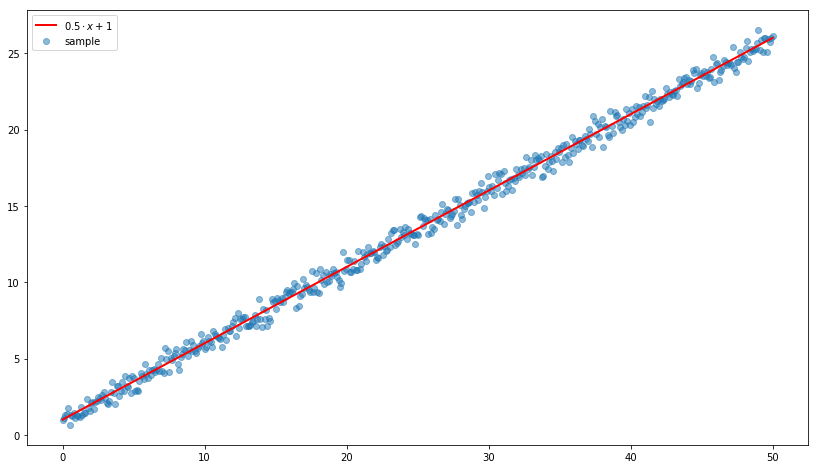

In [6]:
plt.figure(figsize=(14,8))
plt.scatter(xs, sample, alpha=0.5, label='sample')
plt.plot(xs, 0.5 * xs + 1, c='red', linewidth=2, label='$0.5 \cdot x + 1$')
plt.legend()
plt.show()

In [7]:
from sklearn import metrics

In [8]:
def mse(k, b, xs, sample):
    predicted = k * xs + b
    return metrics.mean_squared_error(sample, predicted)

In [9]:
k,b = optimize.minimize(lambda x: mse(x[0], x[1], xs, sample), (0, 0)).x

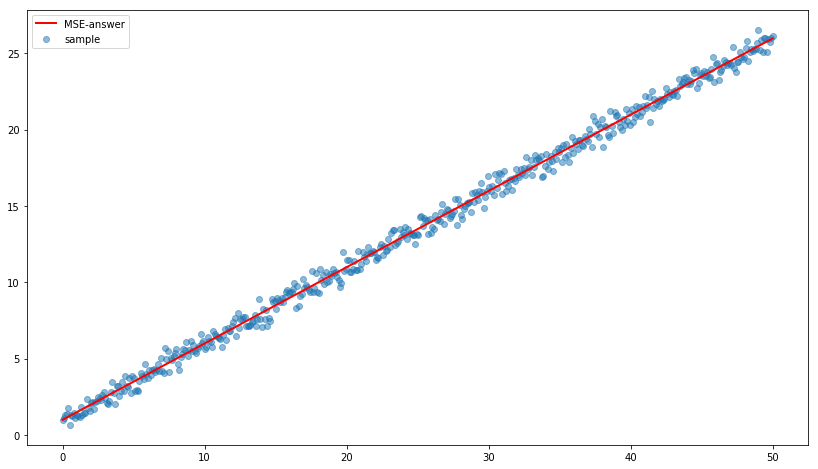

In [10]:
plt.figure(figsize=(14,8))
plt.scatter(xs, sample, alpha=0.5, label='sample')
plt.plot(xs, k * xs + b, c='red', linewidth=2, label='MSE-answer')
plt.legend()
plt.show()

In [11]:
print 'k = {}, b = {}'.format(k,b)

k = 0.499438841301, b = 0.992403024827


В выборке без выбросов восстановить прямую получилось очень хорошо

In [12]:
addictional_xs = stats.uniform(0, 50).rvs(75)

In [13]:
bad_points = -1 + stats.norm(scale=np.sqrt(0.2)).rvs(75)

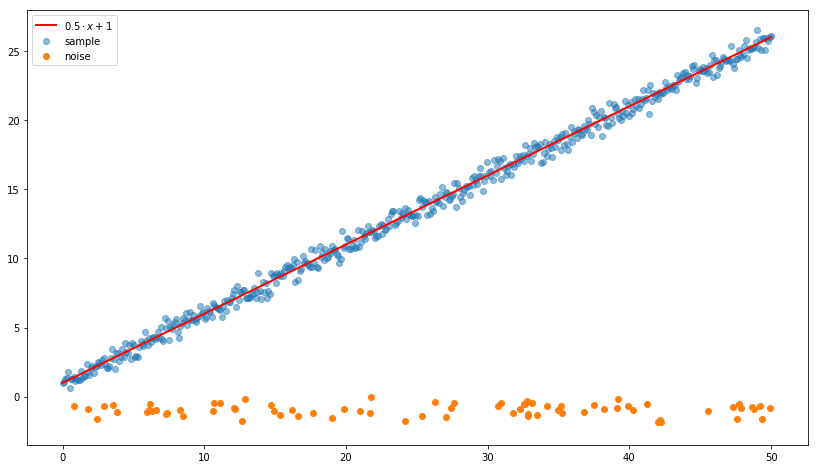

In [14]:
plt.figure(figsize=(14,8))
plt.scatter(xs, sample, alpha=0.5, label='sample')
plt.plot(xs, 0.5 * xs + 1, c='red', linewidth=2, label='$0.5 \cdot x + 1$')
plt.scatter(addictional_xs, bad_points, label='noise')
plt.legend()
plt.show()

In [15]:
xs = np.append(xs, addictional_xs)

In [16]:
sample = np.append(sample, bad_points)

In [17]:
k_mse,b_mse = optimize.minimize(lambda x: mse(x[0], x[1], xs, sample), (0, 0)).x

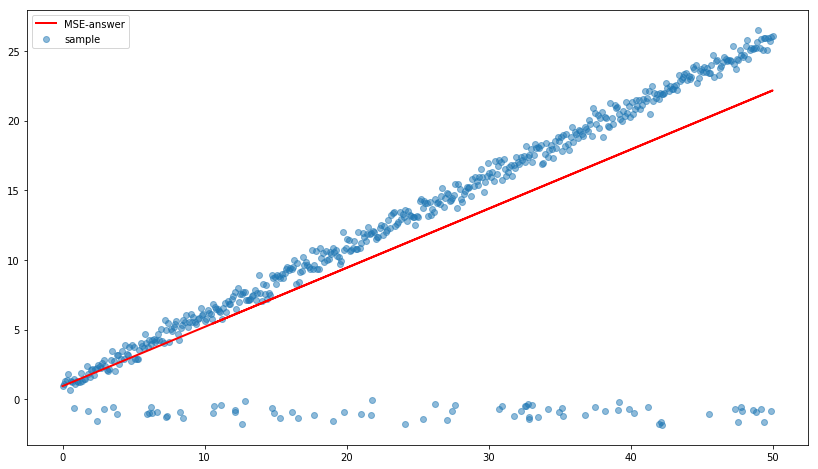

In [18]:
plt.figure(figsize=(14,8))
plt.scatter(xs, sample, alpha=0.5, label='sample')
plt.plot(xs, k_mse * xs + b_mse, c='red', linewidth=2, label='MSE-answer')
plt.legend()
plt.show()

In [19]:
def mae(k, b, xs, sample):
    predicted = k * xs + b
    return metrics.mean_absolute_error(sample, predicted)

In [20]:
k_mae,b_mae = optimize.minimize(lambda x: mae(x[0], x[1], xs, sample), (0, 0)).x

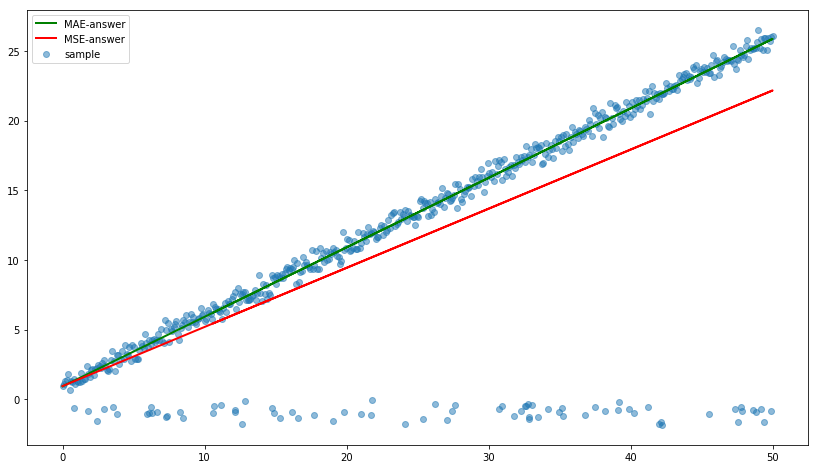

In [21]:
plt.figure(figsize=(14,8))
plt.scatter(xs, sample, alpha=0.5, label='sample')
plt.plot(xs, k_mae * xs + b_mae, c='g', linewidth=2, label='MAE-answer')
plt.plot(xs, k_mse * xs + b_mse, c='r', linewidth=2, label='MSE-answer')
plt.legend()
plt.show()

Оптимизация MAE гораздо более устойчива к выбросам, чем оптимизация MSE, ведь медиана, которая оценивается при минимизации MAE, почти не сдвинется от добавления малого числа выбросов, в отличии от матожидания, которое оценивается при минимизации MSE.